<H1>Forex Arbitrage Trading</H1>

<p>We will find arbitrage trading oppurnities by using garph algorithm. We will use the Bellman Ford algorithm to find negative cycles.</p>
<p> We will be using the dataset that can be obtained from the <a href="https://www.kaggle.com/datasets/brunotly/foreign-exchange-rates-per-dollar-20002019">Link</a></p>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
df = pd.read_csv(r"D:\ML dataset\Unzipped file\Foreign Exchange Rates 2000-2019\Foreign_Exchange_Rates.csv")
df = df.drop(["Unnamed: 0"],axis=1)
df["Time Serie"] = pd.to_datetime(df["Time Serie"])
df = df.replace("ND",np.nan)
df = df.dropna()
for i in df.columns:
    if i !="Time Serie":
        df[i] = df[i].astype('float')
df['USD']=1
df = df.loc[0:100,]
df.head()

,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,...,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$,USD
0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,43.55,...,7.3290,101.70,3.8,7.964,8.4430,72.30,1.5808,31.38,36.97,1
1,2000-01-04,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,...,7.2180,103.09,3.8,7.934,8.3600,72.65,1.5565,30.60,37.13,1
2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,43.55,...,7.2080,103.77,3.8,7.935,8.3530,72.95,1.5526,30.80,37.10,1
3,2000-01-06,1.5291,0.9686,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,43.55,...,7.2125,105.19,3.8,7.940,8.3675,72.95,1.5540,31.75,37.62,1
4,2000-01-07,1.5272,0.9714,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,43.55,...,7.2285,105.17,3.8,7.966,8.4150,73.15,1.5623,30.85,37.30,1


In [2]:
df.columns

Index(['Time Serie', 'AUSTRALIA - AUSTRALIAN DOLLAR/US$',
       'EURO AREA - EURO/US$', 'NEW ZEALAND - NEW ZELAND DOLLAR/US$',
       'UNITED KINGDOM - UNITED KINGDOM POUND/US$', 'BRAZIL - REAL/US$',
       'CANADA - CANADIAN DOLLAR/US$', 'CHINA - YUAN/US$',
       'HONG KONG - HONG KONG DOLLAR/US$', 'INDIA - INDIAN RUPEE/US$',
       'KOREA - WON/US$', 'MEXICO - MEXICAN PESO/US$',
       'SOUTH AFRICA - RAND/US$', 'SINGAPORE - SINGAPORE DOLLAR/US$',
       'DENMARK - DANISH KRONE/US$', 'JAPAN - YEN/US$',
       'MALAYSIA - RINGGIT/US$', 'NORWAY - NORWEGIAN KRONE/US$',
       'SWEDEN - KRONA/US$', 'SRI LANKA - SRI LANKAN RUPEE/US$',
       'SWITZERLAND - FRANC/US$', 'TAIWAN - NEW TAIWAN DOLLAR/US$',
       'THAILAND - BAHT/US$', 'USD'],
      dtype='object')

<p> As we can see from the output we have exchage rate for 22 curriency with US dollar. Let check if we have any null value or not.</p>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99 entries, 0 to 100
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Time Serie                                 99 non-null     datetime64[ns]
 1   AUSTRALIA - AUSTRALIAN DOLLAR/US$          99 non-null     float64       
 2   EURO AREA - EURO/US$                       99 non-null     float64       
 3   NEW ZEALAND - NEW ZELAND DOLLAR/US$        99 non-null     float64       
 4   UNITED KINGDOM - UNITED KINGDOM POUND/US$  99 non-null     float64       
 5   BRAZIL - REAL/US$                          99 non-null     float64       
 6   CANADA - CANADIAN DOLLAR/US$               99 non-null     float64       
 7   CHINA - YUAN/US$                           99 non-null     float64       
 8   HONG KONG - HONG KONG DOLLAR/US$           99 non-null     float64       
 9   INDIA - INDIAN RUPEE/US$   

<p>We have no null value.</p>
<p>Now lets make a function to make that uses Bellman Ford algorithm to find nagative cycles </p>

In [4]:
def find_negative_cycles(graph):
    # Step 1: Prepare the distance dictionary
    distance = {vertex: float('inf') for vertex in graph}
    distance['USD'] = 0  # Assuming 'USD' is the base currency

    # Step 2: Relax edges repeatedly
    for _ in range(len(graph) - 1):
        for u, v, weight in graph.edges(data=True):
            if distance[u] + weight['weight'] < distance[v]:
                distance[v] = distance[u] + weight['weight']

    # Step 3: Check for negative-weight cycles
    for u, v, weight in graph.edges(data=True):
        if distance[u] + weight['weight'] < distance[v]:
            print(f"Strategy: Buy {u}, Sell {v} at rate {abs(weight['weight'])}")
            print(f"Cycle: {u} -> {v} -> ... -> {u}")
            return True

    return False

In [5]:
# Create a directed graph
G = nx.DiGraph()
# Add nodes (currencies) and edges (exchanges) to the graph
currencies = df.columns.to_list()
currencies.remove('Time Serie')
for curr in currencies:
    G.add_node(curr)
zz = df.loc[df["Time Serie"]==df["Time Serie"][0]]
for index, row in df.iterrows():
    for curr1 in currencies:
        for curr2 in currencies:
            if curr1 != curr2:
                a = row[curr1]/row[curr2]
                exchange_rate = -np.log(a)
                G.add_edge(curr1, curr2, weight=exchange_rate)
        if find_negative_cycles(G):
            print(df.loc[index,"Time Serie"])
            print("*****************")

Strategy: Buy AUSTRALIA - AUSTRALIAN DOLLAR/US$, Sell EURO AREA - EURO/US$ at rate 0.43228478356098754
Cycle: AUSTRALIA - AUSTRALIAN DOLLAR/US$ -> EURO AREA - EURO/US$ -> ... -> AUSTRALIA - AUSTRALIAN DOLLAR/US$
2000-01-03 00:00:00
*****************
Strategy: Buy AUSTRALIA - AUSTRALIAN DOLLAR/US$, Sell EURO AREA - EURO/US$ at rate 0.4517320457983866
Cycle: AUSTRALIA - AUSTRALIAN DOLLAR/US$ -> EURO AREA - EURO/US$ -> ... -> AUSTRALIA - AUSTRALIAN DOLLAR/US$
2000-01-04 00:00:00
*****************
Strategy: Buy AUSTRALIA - AUSTRALIAN DOLLAR/US$, Sell EURO AREA - EURO/US$ at rate 0.4517320457983866
Cycle: AUSTRALIA - AUSTRALIAN DOLLAR/US$ -> EURO AREA - EURO/US$ -> ... -> AUSTRALIA - AUSTRALIAN DOLLAR/US$
2000-01-04 00:00:00
*****************
Strategy: Buy AUSTRALIA - AUSTRALIAN DOLLAR/US$, Sell EURO AREA - EURO/US$ at rate 0.4517320457983866
Cycle: AUSTRALIA - AUSTRALIAN DOLLAR/US$ -> EURO AREA - EURO/US$ -> ... -> AUSTRALIA - AUSTRALIAN DOLLAR/US$
2000-01-04 00:00:00
*****************
Str

<p>Lets visualize the last graph</p>

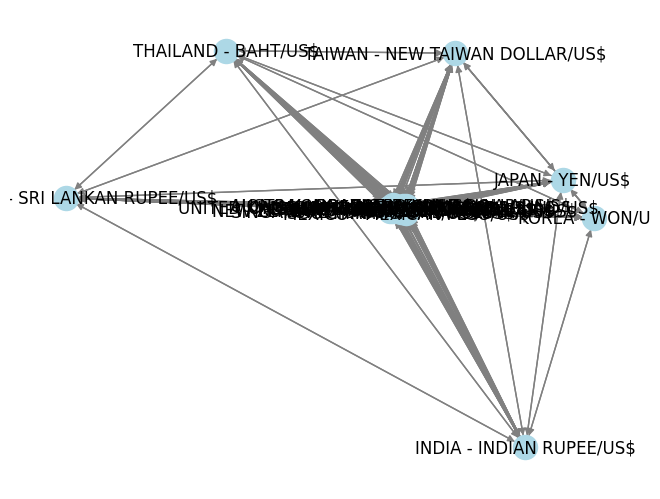

In [6]:
# Visualize the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.show()